In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import pandas as pd
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import json
from collections import Counter
import time
import seaborn as sns
from communitygraph.bipartite import BipartiteCommunity as bp
import communitygraph.util as util

In [5]:
PATH = os.path.join(os.getcwd(), 'data/100k_a.csv')

In [6]:
df = pd.read_csv(PATH, names=['user_id', 'stream_id', 'streamer_name', 'start_time', 'stop_time'])

In [7]:
twitch = bp(df, 'user_id', 'streamer_name', min_item_degree=50)

Initializing...
Filtering dataframe...
Adding nodes...
Adding edges...
Completed.



In [8]:
twitch.describe_bipartite()

Total # of edges (interactions): 2367976

# of unique user_id: 97027
# of unique streamer_name: 6561
# of unique edges: 1063130

Average user_id weighted degree: 24.405330475022417
Average streamer_name weighted degree: 360.91693339429963
Average edge weight: 2.2273625991176997



In [9]:
partition = twitch.partition_items()

Starting partition of items with resolution 1.0...
Starting weighted projection...
Finished weighted projection in 229.0903778076172

Finished partition in 273.52915716171265


In [10]:
projected = twitch.project_onto_items()

In [11]:
community_louvain.modularity(partition, projected)

0.4836538330442834

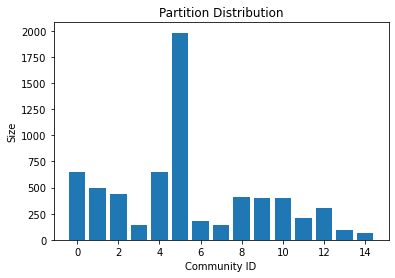

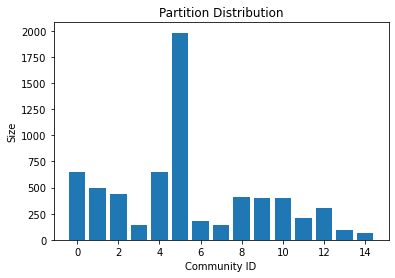

In [12]:
util.plot_partition_distribution(partition)

In [17]:
new_df = util.label_df_partition(df, 'streamer_name', partition)

In [20]:
pwd

'/raid/home/myang349/cse8803-project/twitch'

In [24]:
new_df.to_csv(path_or_buf='/raid/home/myang349/cse8803-project/twitch/data/modified_100k.csv')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


OSError: [Errno 28] No space left on device

In [19]:
df

,user_id,stream_id,streamer_name,start_time,stop_time
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594
...,...,...,...,...,...
3051728,100000,34167930576,mckytv,3582,3583
3051729,100000,34168288656,natehill,3582,3583
3051730,100000,34169594512,fortnite,3582,3584
3051731,100000,34180223072,highdistortion,3709,3711
